In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
df=pd.read_csv("diamonds.csv", index_col="Unnamed: 0")

In [11]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.shape

(53940, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


carat       AxesSubplot(0.125,0.657941;0.227941x0.222059)
depth    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
table    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
price       AxesSubplot(0.125,0.391471;0.227941x0.222059)
x        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
y        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
z              AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

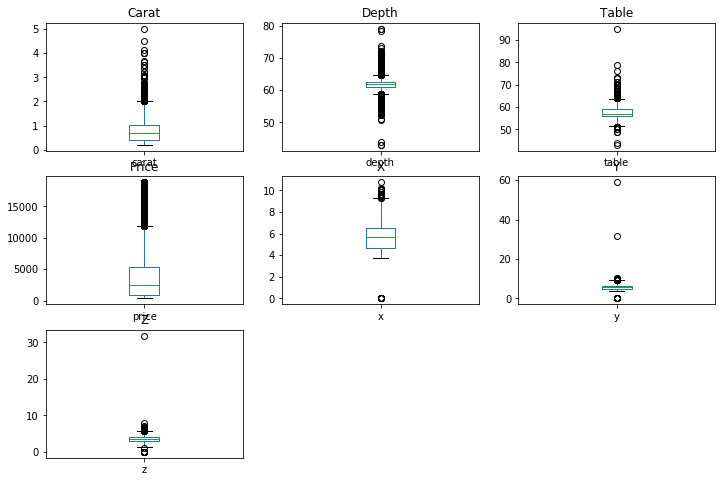

In [16]:
df.plot(kind='box',layout=(3,3),subplots=True,figsize=(12,8),title=['Carat','Depth','Table','Price','X','Y','Z'],)

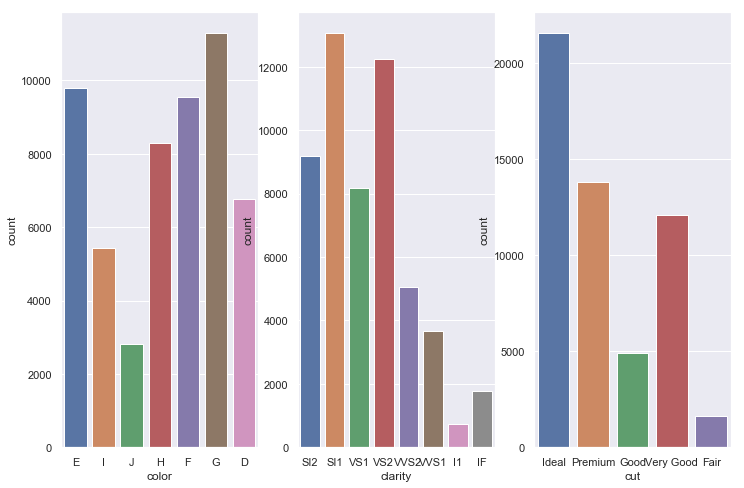

In [17]:
sns.set()
f,ax=plt.subplots(1,3,figsize=(12,8))
sns.countplot(df['color'],ax=ax[0])
sns.countplot(df['clarity'],ax=ax[1])
sns.countplot(df['cut'],ax=ax[2])

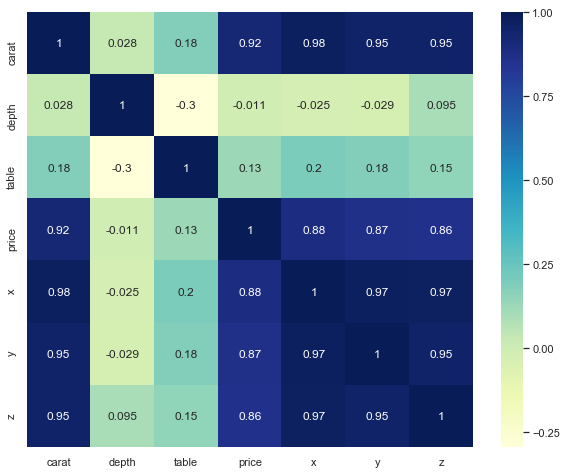

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


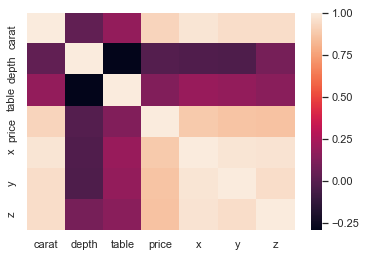

In [24]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

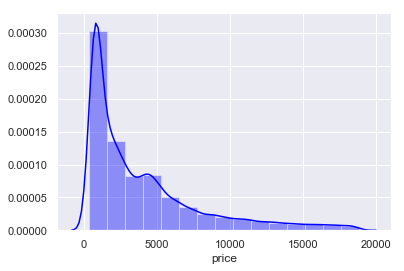

In [25]:
sns.distplot(df["price"], bins=15, color="blue");

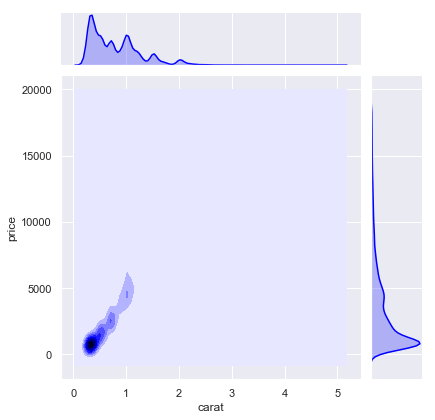

In [26]:
sns.jointplot(x = df["carat"], y = df["price"], kind = "kde", color = "blue");

carat       AxesSubplot(0.125,0.657941;0.227941x0.222059)
depth    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
table    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
price       AxesSubplot(0.125,0.391471;0.227941x0.222059)
x        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
y        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
z              AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

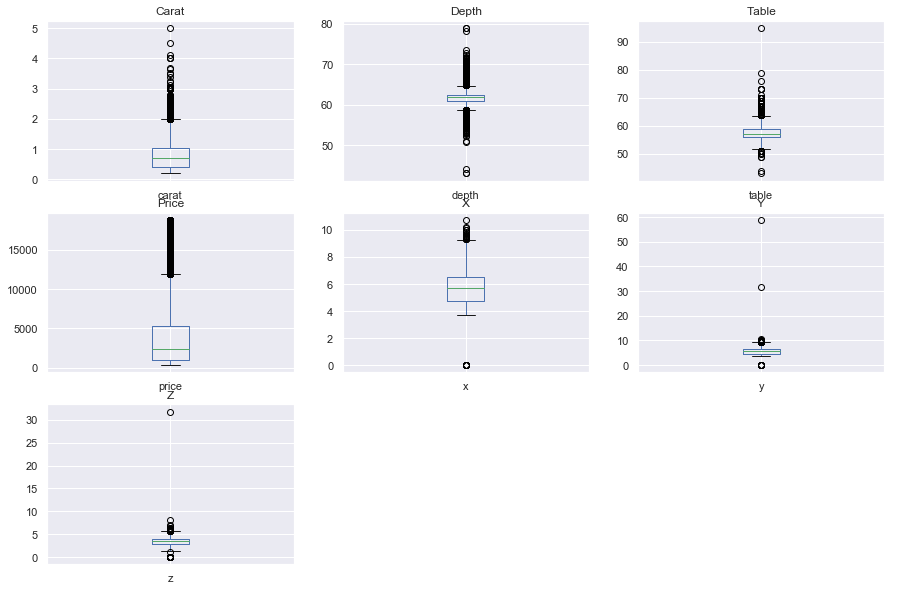

In [27]:
df.plot(kind='box',layout=(3,3),subplots=True,figsize=(15,10),title=['Carat','Depth','Table','Price','X','Y','Z'],)

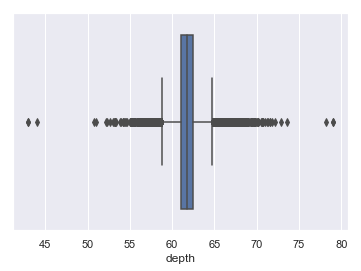

In [28]:
sns.boxplot(x=df["depth"])

In [30]:
q1=df["depth"].quantile(0.25)
q3=df["depth"].quantile(0.75)
ıqr= q3-q1
alt_sınır = q1 - (1.5*ıqr)
ust_sınır = q3 + (1.5*ıqr)

In [31]:
filt1_alt= df["depth"]<alt_sınır
filt1_ust= df["depth"]>ust_sınır

In [32]:
table_outlier_alt_index = df[filt1_alt]["depth"].index

In [33]:
df.loc[table_outlier_alt_index,"depth"]=alt_sınır

In [34]:
table_outlier_ust_index=df[filt1_ust]["depth"].index

In [35]:
df.loc[table_outlier_ust_index,"depth"]=ust_sınır

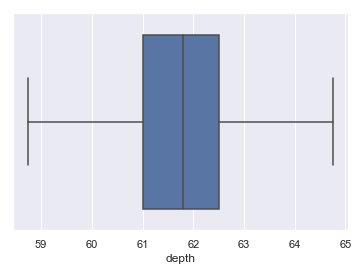

In [36]:
sns.boxplot(x=df["depth"])

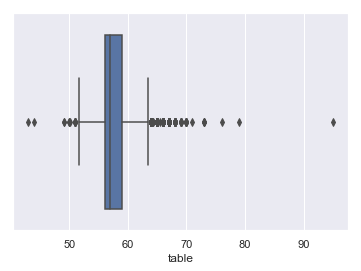

In [37]:
sns.boxplot(x=df["table"])

In [38]:
df["table"].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [39]:
q1=df["table"].quantile(0.25)
q3=df["table"].quantile(0.75)
ıqr= q3-q1
alt_sınır = q1 - (1.5*ıqr)
ust_sınır = q3 + (1.5*ıqr)

In [40]:
filt1_alt= df["table"]<alt_sınır
filt1_ust= df["table"]>ust_sınır

In [41]:
table_outlier_alt_index = df[filt1_alt]["table"].index

In [42]:
df.loc[table_outlier_alt_index,"table"]=alt_sınır
table_outlier_ust_index=df[filt1_ust]["table"].index
df.loc[table_outlier_ust_index,"table"]=ust_sınır

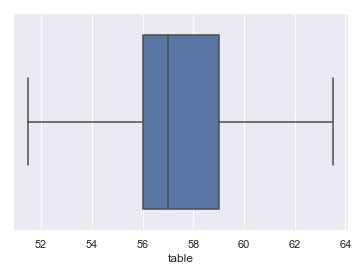

In [43]:
sns.boxplot(x=df["table"])

In [46]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [47]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75


In [48]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [49]:
df["new_color"]=lbe.fit_transform(df["color"])

In [50]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [51]:
df["new_clarity"]=lbe.fit_transform(df["clarity"])

In [52]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,new_color,new_clarity
1,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43,1,3
2,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31,1,2
3,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31,1,4
4,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63,5,5
5,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75,6,3


In [53]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
df["new_cut"]=lbe.fit_transform(df["cut"])

In [55]:
df=df.drop(["cut", "color","clarity"], axis=1)

In [56]:
df

,carat,depth,table,price,x,y,z,new_color,new_clarity,new_cut
1,0.23,61.50,55.0,326,3.95,3.98,2.43,1,3,2
2,0.21,59.80,61.0,326,3.89,3.84,2.31,1,2,3
3,0.23,58.75,63.5,327,4.05,4.07,2.31,1,4,1
4,0.29,62.40,58.0,334,4.20,4.23,2.63,5,5,3
5,0.31,63.30,58.0,335,4.34,4.35,2.75,6,3,1
6,0.24,62.80,57.0,336,3.94,3.96,2.48,6,7,4
7,0.24,62.30,57.0,336,3.95,3.98,2.47,5,6,4
8,0.26,61.90,55.0,337,4.07,4.11,2.53,4,2,4
9,0.22,64.75,61.0,337,3.87,3.78,2.49,1,5,0
10,0.23,59.40,61.0,338,4.00,4.05,2.39,4,4,4


In [57]:
y=df["new_cut"]
X=df.drop("new_cut",axis=1)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [59]:
cart_model=DecisionTreeClassifier().fit(x_train,y_train)

In [60]:
y_pred=cart_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7028179458657768

In [61]:
cart_params={"max_depth":[1,5,10,20],"min_samples_split":[2,5,10,20,50]}
cart=DecisionTreeClassifier()
cart_cv=GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   12.8s finished


In [62]:
cart_cv.best_score_

0.742385719582605

In [63]:
cart_cv.best_params_

{'max_depth': 20, 'min_samples_split': 50}

In [64]:
cart_tuned=DecisionTreeClassifier(max_depth=5,min_samples_split=20).fit(x_train,y_train)

In [65]:
y_pred=cart_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7287727104189841

In [66]:
cart_tuned.score(x_test,y_test)

0.7287727104189841

In [67]:
rfm=RandomForestClassifier().fit(x_train,y_train)
y_pred=rfm.predict(x_test)
accuracy_score(y_test,y_pred)

0.764058830799654

In [68]:
rfm.score(x_test,y_test)

0.764058830799654

In [69]:
rf_params={"n_estimators":[10,50,100],"max_features":[3,5,7]}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,rf_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   58.0s finished


In [70]:
rf_cv.best_score_

0.7735844059537051

In [71]:
rf_cv.best_params_

{'max_features': 5, 'n_estimators': 100}

In [72]:
rf_tuned=RandomForestClassifier(max_features=7,n_estimators=100).fit(x_train,y_train)

In [73]:
y_pred=rf_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7813620071684588

In [74]:
rf_tuned.score(x_test,y_test)

0.7813620071684588

In [75]:
gbm_model=GradientBoostingClassifier().fit(x_train,y_train)
y_pred=gbm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7548510690891114

In [76]:
gbm_model.score(x_test,y_test)

0.7548510690891114

In [78]:
#Highest success rate model: Random Forest with 78.13 %